# Language in Social Context: Bridging NLP and Sociolinguistics (ESSLLI 2024)
## Day 1: Trust Data Analysis

This exercise's goal is to get familiar with Google Colab and Pandas dataframes. We will use data from Hovy's et al. 2020 "*You Sound Just Like Your Father Commercial Machine Translation Systems Include Stylistic Biases*" (https://github.com/MilaNLProc/translation_bias).

We will look into:

1. Data count
2. Droping duplicates and NaN from data
3. Visualizing label distribution
  - 3.1 Gender label distribution
  - 3.2 Age label distribution
4. Sentence length
  - 4.1 Getting the sentence length for the data
  - 4.2 Min and Max sentence length
  - 4.3 Top 20 sentence length
  - 4.4 Bottom 20 sentence length
5. Word count
  - 5.1 Get Each Row Word Count
  - 5.2 Min and Max word length
  - 5.3 Top 20 word length
6. Sentiment analysis
  - 6.1 Female sentiment distribution
  - 6.2 Male sentiment distribution

**Your task is to fill in the missing pieces of code.**

---



# Install Required Packages
*Use "pip install" to install the package*

In [49]:
! pip install datasets

# Load Python Libraries


In [50]:
import numpy as np
import random
import os
import datetime
import datasets
import matplotlib.pyplot as plt
import pandas as pd
import time
import spacy


# Load Spacy model
spaCy is an open-source software library for advanced natural language processing

In [51]:
nlp = spacy.load("en_core_web_sm")


# Load the data

In [52]:
# download the Trust data from https://github.com/MilaNLProc/translation_bias.git
! git clone https://github.com/MilaNLProc/translation_bias.git

fatal: destination path 'translation_bias' already exists and is not an empty directory.


In [53]:
# TODO: change data directories if you run the code locally
df_train = pd.read_excel("/content/translation_bias/data/en_us/en_us_TRAIN.xlsx")
df_test = pd.read_excel("/content/translation_bias/data/en_us/en_us_TEST.xlsx")


# View train data

In [54]:
df_train.head() # view top 5 rows


,Unnamed: 0,text,age,age_cat,gender,label
0,238,Not the best overall service.,42,25-54,M,train
1,239,Since it is the #1 social network however with...,42,25-54,M,train
2,240,"Not only that you can find anything, but its r...",42,25-54,M,train
3,241,I'm always satisfied with their level of servi...,42,25-54,M,train
4,242,"On time, nice chap and worked like a pro - Ver...",32,25-54,M,train


In [55]:
# [TODO] Show the 5 bottom rows of df_train

In [56]:
# renaming columns
df_train.rename(columns={'label': 'data_for', 'gender': 'label','age_cat':'ageRange'}, inplace=True)
df_test.rename(columns={'label': 'data_for', 'gender': 'label','age_cat':'ageRange'}, inplace=True)

In [57]:
df_train.head()

,Unnamed: 0,text,age,ageRange,label,data_for
0,238,Not the best overall service.,42,25-54,M,train
1,239,Since it is the #1 social network however with...,42,25-54,M,train
2,240,"Not only that you can find anything, but its r...",42,25-54,M,train
3,241,I'm always satisfied with their level of servi...,42,25-54,M,train
4,242,"On time, nice chap and worked like a pro - Ver...",32,25-54,M,train


# 1. Data Count

In [58]:
print("Train Data count:", len(df_train))
print("Test Data count:", len(df_test))

Train Data count: 5004
Test Data count: 403


# 2. Drop duplicates and NaN from Train data
Since we will be using the train data to train the model, it's best to drop the duplicates.

In [59]:
print("Before dropping:")
print(len(df_train))
df_train.isnull().values.any()
df_train = df_train.drop_duplicates()
df_train = df_train[df_train['text'].notna()]


print("After dropping:")
print(len(df_train))


Before dropping:
5004
After dropping:
4996



> **Note after running the above cell:** It drops the duplicates row from the data. (If table includes duplicates) Here we notice that the data doesn't have any duplicates.

# 3. Label distribution

### 3.1 Gender Label Distribution

In [60]:
df_train["label"].value_counts()

,count
label,
F,2501
M,2495




> Visualizing the above values



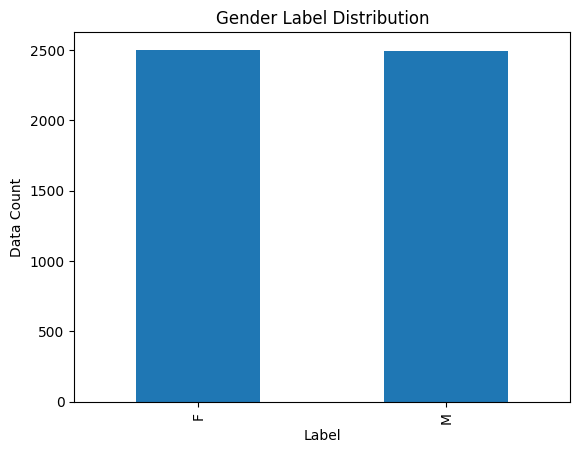

In [61]:
df_train.label.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("Data Count")
plt.title('Gender Label Distribution')
plt.show()


> <b> Note:</b> As seen in the figure, data is balanced. <br> And there are two labels F and M which is "Female" and "Male"

### 3.2 Age Label Distribution

In [62]:
df_train["ageRange"].value_counts()

,count
ageRange,
25-54,2413
65+,981
15-24,807
55-64,795




> Visualizing the above values



In [63]:
# TODO: Based on the code for gender, visualize the age distribution in the data


> <b> Note:</b> You should see in the figure that there are four labels: 15-24, 25-54, 55-64, 65+. Moreover, the data is imbalanced, e.g, number of data points for 25-54 is way higher compared to other labels.<br>

> Add blockquote



# 4. Sentence Length
Note on library: <br>
<b>NLTK library</b> is faster but has issues in tokenizing sentences. <br> Example: "Use a pen to write (only black pen.)." and nltk sentence tokenizer returns a list of 2 sentences ['Use a pen to write (only black pen.', ').']
<br>
<br>
<b>Spacy</b> is slow but handles such text as it returned 1 sentence ['Use a pen to write (only black pen.).']



In [64]:
def sent_len(text):
  doc = nlp(text)
  sents_list = [sent.text for sent in doc.sents]
  return len(sents_list)


### 4.1. Getting the sentence length for the data
**NOTE:** it takes approx 2 minutes to run this cell

In [65]:
import time
st = time.time()
df_train["text_sent_count"] = df_train["text"].apply(sent_len)
en = time.time()
print(en-st)
df_train.head(2)

98.59032917022705


,Unnamed: 0,text,age,ageRange,label,data_for,text_sent_count
0,238,Not the best overall service.,42,25-54,M,train,1
1,239,Since it is the #1 social network however with...,42,25-54,M,train,1


### 4.2 Min and Max sentence length

In [66]:
df_train['text_sent_count'].agg(['min', 'max'])

,text_sent_count
min,1
max,104


In [67]:
# TODO: Based on the code above, visualize the disctibution of sentence lenghts.

<b>Note</b>: from the figure, you should see that the users tend to write shorter reviews.

# 4.3 Top 20 sentence length

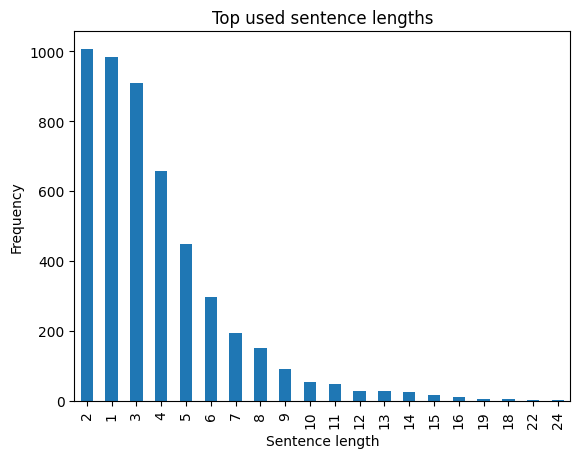

In [68]:

x = df_train.text_sent_count.value_counts().sort_index(ascending=True)

# sort the values
x = x.sort_values(ascending=False)

# take top 20
x= x[:20]

# plot
x.plot(kind='bar')
plt.xlabel("Sentence length")
plt.ylabel("Frequency")
plt.title('Top used sentence lengths')

plt.show()

# 4.4 Bottom 20 sentence length


In [69]:
# TODO: Based on the code above, visualize the bottom 20 sentence lengths.

### 4.5 Let's check rows that have the longest sentence length i.e 104

In [70]:
df_train[df_train['text_sent_count']==104]

,Unnamed: 0,text,age,ageRange,label,data_for,text_sent_count
4058,4461,BUYER BEWARE !!! How Nissan Of Chesapeake GOT ...,59,55-64,M,train,104


In [71]:
# View only text
list(df_train[df_train['text_sent_count']==104]["text"])

["BUYER BEWARE !!! How Nissan Of Chesapeake GOT AWAY With Charging Me $5K($5,000.00) Above The Sticker Price Of A 2014 Nissan Altima S !!! I Received A Card In The Mail From NOC Telling Me I Owned A 2009 Chrysler 300LX & That My Monthly Payments Were Just $270.00 A Month. They Said They Would Offer 2 Refinance Existing Loan 4 Cheaper Interest Rate Or Trade In My Car Offering Me 10% More Then It Was Worth, Pay Off The Loan, & Give Me A Deal I Could Not Resist On Purchasing A Brand New Car From Them !!! I Called Them & Made An Appointment 4 May 30, 2014 !!! The Sales Team Act As Though They Are Trying Their Best 2 Help U Or Become Your Friends When In Fact What They Are Really Doing Is 2 Get U 2 Drop Your Guard Down So They Can Become Your Worst Enemy & Get As Much Money Out Of U As Possible !!! Here Is How They Conned Me In2 Signing A Binding Contract Paying $200.00 More Each Month 4 The Next 72 Months 4 A Car I Did Not Want !!! Initially I Was Not Even Looking 4 A Brand New Car 2 Purch

# 5. Word Count

### 5.1 Get Each Row Word Count
**This cell takes approx 2 minutes to run**

In [72]:
import time

def word_len(text):
  doc = nlp(text)
  words_list = [token.text for token in doc]
  return len(words_list)

st = time.time()
df_train["text_word_count"] = df_train["text"].apply(word_len)
df_train.head(2)

,Unnamed: 0,text,age,ageRange,label,data_for,text_sent_count,text_word_count
0,238,Not the best overall service.,42,25-54,M,train,1,6
1,239,Since it is the #1 social network however with...,42,25-54,M,train,1,53


### 5.2 Min and Max word length

In [73]:
df_train['text_word_count'].agg(['min', 'max'])

,text_word_count
min,1
max,1432


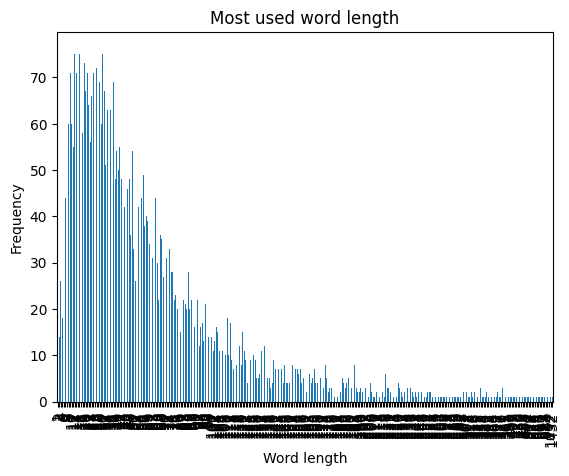

In [74]:
x = df_train.text_word_count.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Word length")
plt.ylabel("Frequency")
plt.title('Most used word length')

plt.show()

Note: Since the figure is not clear to understand, Let's take top 20 word counts

# 5.3 Top 20 word length

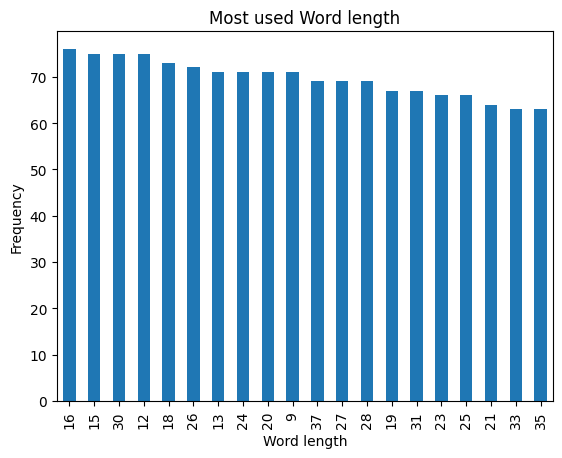

In [75]:

# Sort values
x = df_train.text_word_count.value_counts().sort_index(ascending=True)
x = x.sort_values(ascending=False)

# Take top 20
x= x[:20]

# Plot
x.plot(kind='bar')
plt.xlabel("Word length")
plt.ylabel("Frequency")
plt.title('Most used Word length')

plt.show()

Note: from the figure we can see that the top word length is below 35


In [76]:
# TODO: Instead of taking the first 20 most frequent word lenghts, plot the length of words in bins of 20 (1-20, 20-40, 40-60, 60+)

# 6. Sentiment Analysis

In [77]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter

nltk.download([
    "stopwords",
    "vader_lexicon",
    "punkt",
 ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
sentiment_model = SentimentIntensityAnalyzer()

def return_sentiment(text):
  if sentiment_model.polarity_scores(text)["compound"] >= 0: #sentiment as positive when compound value is positive and sentiment as negative when the compound value is negative
    return "positive"
  else:
    return "negative"

df_train["sentiment"] = df_train["text"].apply(return_sentiment)
df_train.head()

,Unnamed: 0,text,age,ageRange,label,data_for,text_sent_count,text_word_count,sentiment
0,238,Not the best overall service.,42,25-54,M,train,1,6,negative
1,239,Since it is the #1 social network however with...,42,25-54,M,train,1,53,positive
2,240,"Not only that you can find anything, but its r...",42,25-54,M,train,1,16,positive
3,241,I'm always satisfied with their level of servi...,42,25-54,M,train,2,42,positive
4,242,"On time, nice chap and worked like a pro - Ver...",32,25-54,M,train,1,17,positive


In [79]:
female_sentiment_df = df_train[df_train['label']=="F"]
male_sentiment_df = df_train[df_train['label']=="M"]

# 6.1 Female Sentiment Distribution

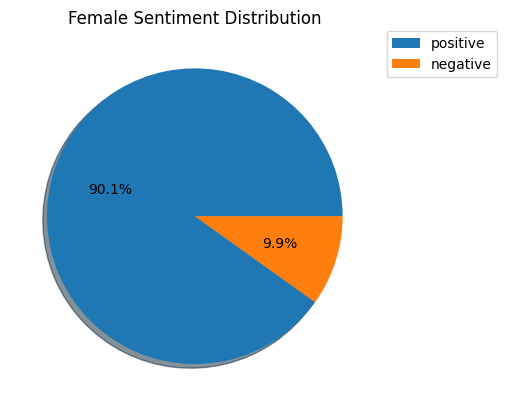

In [80]:
data = female_sentiment_df['sentiment'].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Female Sentiment Distribution', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# 6.2 Male Sentiment Distribution

In [81]:
# TODO: Based on the code above, compare sentiment in male reviews.